In [127]:
import numpy as np
from scipy import stats

In [128]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from utils import run_random_forest_experiment

from IT_methods.utils import equal_frequency_binning
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
np.random.seed(101)

In [130]:
X1 = stats.uniform.rvs(-1, 2, size=100).reshape(-1,1)
X2 = stats.uniform.rvs(-1, 2, size=100).reshape(-1,1)
X3 = stats.uniform.rvs(-1, 2, size=100).reshape(-1,1)
X4 = stats.uniform.rvs(-1, 2, size=100).reshape(-1,1)
X5 = stats.uniform.rvs(-1, 2, size=100).reshape(-1,1)
X6 = stats.uniform.rvs(-1, 2, size=100).reshape(-1,1)
X7 = stats.uniform.rvs(-1, 2, size=100).reshape(-1,1)
X8 = stats.uniform.rvs(-1, 2, size=100).reshape(-1,1)

y = (X7*X8 < 0).astype(int)
y = y.flatten()

In [131]:
def get_bin(x, n_bins):
    bins = np.linspace(-1, 1, n_bins+1)
    for i in range(len(bins)-1):
        if bins[i] <= x and x < bins[i+1]:
            return i

    return n_bins - 1

def discretize(X, n_bins):
    for i in range(len(X)):
        X[i] = get_bin(X[i], n_bins)
    return X

In [132]:
predictors = [X1, X2, X3, X4, X5, X6, X7, X8]

for i in range(len(predictors)):
    predictors[i] = discretize(predictors[i], 4).astype(int)


In [133]:
X = np.hstack(predictors)

In [134]:


df = run_random_forest_experiment(
    X, y, 2, save_csv="results/artificial_not_working.csv", random_state=1)



All features accuracy: 85.00%, F1_macro: 84.65%

Feature importance selected features: [7 6]
Accuracy: 100.00%, F1_macro: 100.00%

RFE selected features: [6 7]
Accuracy: 100.00%, F1_macro: 100.00%

JMI selected features: [7, 6]
Accuracy: 100.00%, F1_macro: 100.00%

mRMR selected features: [7, 5]
Accuracy: 65.00%, F1_macro: 64.19%

CMIM selected features: [7, 6]
Accuracy: 100.00%, F1_macro: 100.00%

Randomly selected features: [2, 4]
Accuracy: 60.00%, F1_macro: 58.33%



In [135]:
df

Method         Selected Features  Accuracy    F1_macro
0        All features  [0, 1, 2, 3, 4, 5, 6, 7]      85.0   84.654731
1  Feature importance                    [7, 6]     100.0  100.000000
2                 RFE                    [6, 7]     100.0  100.000000
3                 JMI                    [7, 6]     100.0  100.000000
4                mRMR                    [7, 5]      65.0   64.194373
5                CMIM                    [7, 6]     100.0  100.000000
6              Random                    [2, 4]      60.0   58.333333

In [22]:
df['Selected Features'].apply(lambda x: set(x))

0    {0, 1, 2, 3, 4, 5, 6, 7}
1                      {6, 7}
2                      {6, 7}
3                      {0, 4}
4                      {0, 5}
5                      {0, 4}
6                      {2, 4}
Name: Selected Features, dtype: object

In [30]:
df['selected_feature_set'] = df['Selected Features'].apply(lambda x: str(set(x)))

<Axes: >

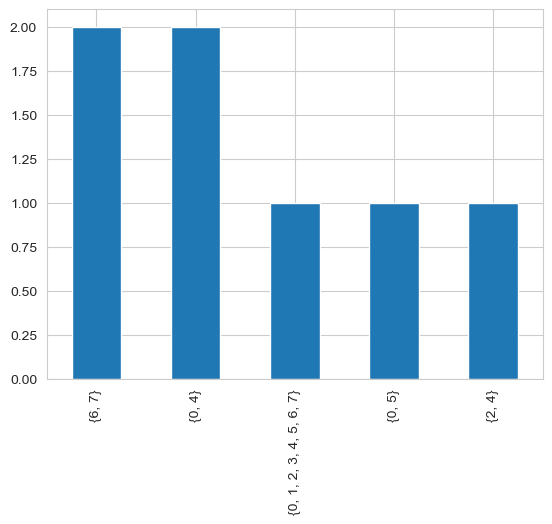

In [31]:
df['selected_feature_set'].value_counts().plot(kind='bar', label='Method')

<Axes: >

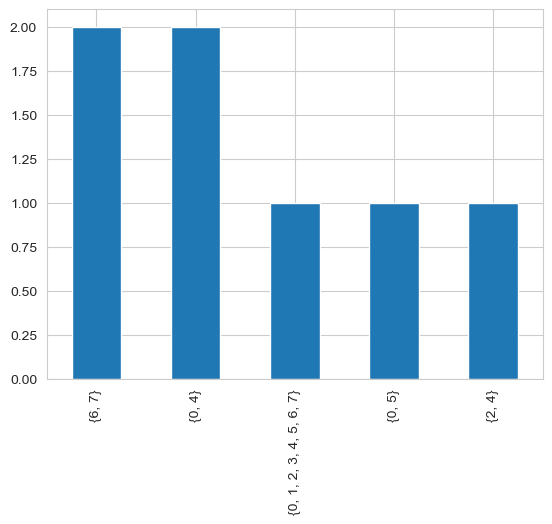

In [32]:
df['selected_feature_set'].value_counts().plot(kind='bar', label='Method')

In [33]:
df.groupby(['Method', 'selected_feature_set'])[['selected_feature_set']].count()#.hist(column='selected_feature_set', label='Method')

selected_feature_set
Method             selected_feature_set                          
All features       {0, 1, 2, 3, 4, 5, 6, 7}                     1
CMIM               {0, 4}                                       1
Feature importance {6, 7}                                       1
JMI                {0, 4}                                       1
RFE                {6, 7}                                       1
Random             {2, 4}                                       1
mRMR               {0, 5}                                       1

In [156]:
def single_experiment(seed):
    np.random.seed(seed)

    X1 = stats.uniform.rvs(-1, 2, size=100).reshape(-1,1)
    X2 = stats.uniform.rvs(-1, 2, size=100).reshape(-1,1)
    X3 = stats.uniform.rvs(-1, 2, size=100).reshape(-1,1)
    X4 = stats.uniform.rvs(-1, 2, size=100).reshape(-1,1)
    X5 = stats.uniform.rvs(-1, 2, size=100).reshape(-1,1)
    X6 = stats.uniform.rvs(-1, 2, size=100).reshape(-1,1)
    X7 = stats.uniform.rvs(-1, 2, size=100).reshape(-1,1)
    X8 = stats.uniform.rvs(-1, 2, size=100).reshape(-1,1)

    y = (X7*X8 > 0).astype(int)
    y = y.flatten()

    predictors = [X1, X2, X3, X4, X5, X6, X7, X8]

    for i in range(len(predictors)):
        predictors[i] = discretize(predictors[i], 4).astype(int)

    X = np.hstack(predictors)

    df = run_random_forest_experiment(
        X, y, 2, save_csv="results/artificial_not_working.csv", random_state=1)

    df['seed'] = seed

    return df

In [157]:
df_all = []
seeds = list(range(500))

for seed in seeds:
    df_all.append(single_experiment(seed))

All features accuracy: 55.00%, F1_macro: 52.00%

Feature importance selected features: [7 6]
Accuracy: 100.00%, F1_macro: 100.00%

RFE selected features: [6 7]
Accuracy: 100.00%, F1_macro: 100.00%

JMI selected features: [5, 1]
Accuracy: 45.00%, F1_macro: 37.32%

mRMR selected features: [5, 4]
Accuracy: 55.00%, F1_macro: 52.00%

CMIM selected features: [5, 1]
Accuracy: 45.00%, F1_macro: 37.32%

Randomly selected features: [2, 4]
Accuracy: 30.00%, F1_macro: 30.00%

All features accuracy: 65.00%, F1_macro: 64.91%

Feature importance selected features: [7 6]
Accuracy: 100.00%, F1_macro: 100.00%

RFE selected features: [6 7]
Accuracy: 100.00%, F1_macro: 100.00%

JMI selected features: [5, 2]
Accuracy: 40.00%, F1_macro: 39.39%

mRMR selected features: [5, 2]
Accuracy: 40.00%, F1_macro: 39.39%

CMIM selected features: [5, 2]
Accuracy: 40.00%, F1_macro: 39.39%

Randomly selected features: [2, 4]
Accuracy: 45.00%, F1_macro: 43.73%

All features accuracy: 80.00%, F1_macro: 80.00%

Feature impor

In [158]:
df_all = pd.concat(df_all)

In [159]:
df_all['selected_feature_set'] = df_all['Selected Features'].apply(lambda x: str(set(x)))

In [160]:
df_grouped = df_all.groupby(['Method', 'selected_feature_set'],as_index=False).count()[['Method', 'selected_feature_set', 'Selected Features']]

In [161]:
df_grouped = df_grouped[df_grouped.Method.isin(['CMIM', 'mRMR', 'JMI', 'Feature importance' ,'RFE'])]

In [162]:
df_grouped

Method selected_feature_set  Selected Features
1    CMIM               {0, 1}                 20
2    CMIM               {0, 2}                 20
3    CMIM               {0, 3}                 16
4    CMIM               {0, 4}                 17
5    CMIM               {0, 5}                 18
..    ...                  ...                ...
95   mRMR               {4, 6}                 13
96   mRMR               {4, 7}                 26
97   mRMR               {5, 6}                 20
98   mRMR               {5, 7}                 17
99   mRMR               {6, 7}                  1

[98 rows x 3 columns]

In [163]:
order = df_grouped.groupby('selected_feature_set').sum('Selected Features').sort_values('Selected Features', ascending=False).reset_index()['selected_feature_set'].to_list()
order

['{6, 7}',
 '{1, 2}',
 '{0, 2}',
 '{2, 5}',
 '{0, 1}',
 '{2, 4}',
 '{2, 3}',
 '{0, 5}',
 '{4, 5}',
 '{1, 3}',
 '{1, 5}',
 '{0, 3}',
 '{0, 4}',
 '{3, 4}',
 '{1, 6}',
 '{4, 7}',
 '{3, 5}',
 '{0, 6}',
 '{2, 7}',
 '{5, 6}',
 '{0, 7}',
 '{3, 6}',
 '{2, 6}',
 '{1, 4}',
 '{3, 7}',
 '{1, 7}',
 '{5, 7}',
 '{4, 6}']

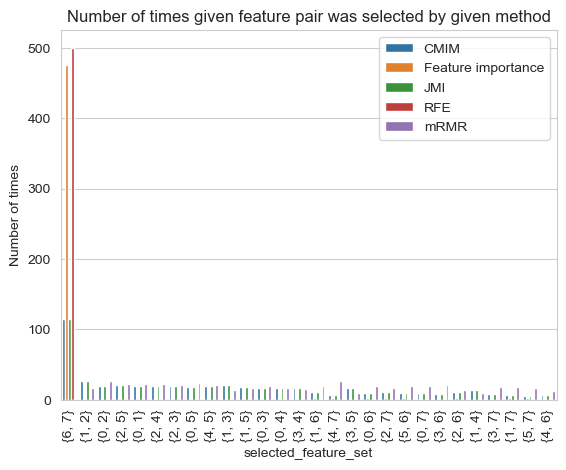

In [169]:
sns.barplot(df_grouped, y='Selected Features', x='selected_feature_set', hue='Method', order=order)
plt.xticks(rotation=90)
plt.legend(loc=1)
plt.title('Number of times given feature pair was selected by given method')
plt.ylabel('Number of times')
plt.show()

In [165]:
df_grouped

Method selected_feature_set  Selected Features
1    CMIM               {0, 1}                 20
2    CMIM               {0, 2}                 20
3    CMIM               {0, 3}                 16
4    CMIM               {0, 4}                 17
5    CMIM               {0, 5}                 18
..    ...                  ...                ...
95   mRMR               {4, 6}                 13
96   mRMR               {4, 7}                 26
97   mRMR               {5, 6}                 20
98   mRMR               {5, 7}                 17
99   mRMR               {6, 7}                  1

[98 rows x 3 columns]

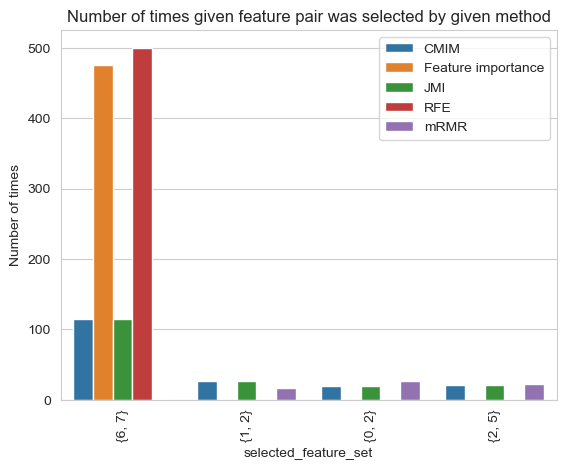

In [168]:
sns.barplot(df_grouped[(df_grouped.selected_feature_set == '{2, 5}') | (df_grouped.selected_feature_set == '{6, 7}') | (df_grouped.selected_feature_set == '{1, 2}') | (df_grouped.selected_feature_set == '{0, 2}')], y='Selected Features', x='selected_feature_set', hue='Method', order=order[:4])
plt.xticks(rotation=90)
plt.legend(loc=1)
plt.title('Number of times given feature pair was selected by given method')
plt.ylabel('Number of times')
plt.show()